In [1]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
import cv2
import os
import pickle
import numpy as np

In [3]:
import sys
sys.path.append('..')
from rectangles_drawing import calculate_one_pixels_diffs

In [4]:
# ! git clone https://github.com/experiencor/keras-yolo3.git

Попробуем, разобраться, какой должен быть формат в данных

In [4]:
def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

In [3]:
class_names = get_classes("keras-yolo3/_classes.txt")
print(class_names)

['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']


In [4]:
lines = [
    "00a7a49c47d51fd16a4cbb17e2d2cf86.jpg 213,226,241,306,7",
    "07d23be6925657674d77bee6b4d05ac6.jpg 48,300,76,363,8",
    "07d39f228cc8583410486a6cf49a0957.jpg 336,296,368,355,5 257,266,291,353,1 232,100,261,173,4 271,83,292,127,3 247,204,271,250,3"
]

In [48]:
l = lines[2]

In [49]:
spl = l.split()
filename = spl[0]
boxes = spl[1:]
bboxes = list(map(lambda x: x.split(','), boxes))

In [50]:
print(bboxes)

[['336', '296', '368', '355', '5'], ['257', '266', '291', '353', '1'], ['232', '100', '261', '173', '4'], ['271', '83', '292', '127', '3'], ['247', '204', '271', '250', '3']]


In [51]:
img = cv2.imread(os.path.join('keras-yolo3', filename))

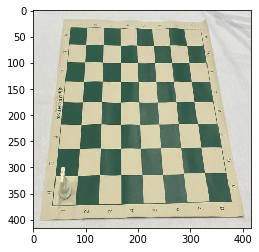

In [46]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

```
import cv2

cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)


x1,y1 ------
|          |
|          |
|          |
--------x2,y2
```

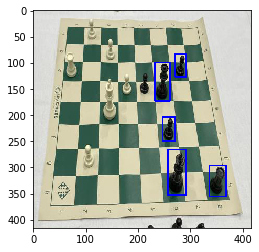

In [52]:
img_copy = img.copy()
for i in range(len(bboxes)):
    bbox = list(map(int, bboxes[i]))
    x1, y1, x2, y2, class_id = bbox
    cv2.rectangle(img_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

### 1. Нужно привести данные в нужный формат

In [53]:
# Считать train_val_test
# Написать функцию преобразования в annotations
# Применить по отдельности к train, val и test

In [56]:
with open('../dataset/train_val_test_split.pickle', 'rb') as f:
    train_val_test = pickle.load(f)

In [58]:
train_filenames = train_val_test['train']
validate_filenames = train_val_test['validate']
test_filenames = train_val_test['test']

In [59]:
print(len(train_filenames))
print(len(validate_filenames))
print(len(test_filenames))

13109
4370
4370


In [14]:
yolo_dataset_path = 'YOLO_DATASET_ANNOTATIONS/'

In [63]:
# Записываем файлик с классами

class_names = ['wood', 'water', 'valley', 'peak', 'ridge']

with open(os.path.join(yolo_dataset_path, '_classes.txt'), 'w') as f:
    f.write('\n'.join(class_names))


In [65]:
satellites_folder = "../dataset/satellite"
maps_folder = "../dataset/map"
jsons_folder = "../dataset/jsons"
objects_folder = "../dataset/objects"
tags_folder = "../dataset/tags"
corners_folder = "../dataset/corners"

In [94]:
H, W, _ = cv2.imread(os.path.join(maps_folder, train_filenames[1] + '.png')).shape
print(H, W)

300 400


In [95]:
filename = train_filenames[0] + '.pickle'

with open(os.path.join(objects_folder, filename), 'rb') as f:
    objects = pickle.load(f)
    
print("Objects:", objects[:5])
    
with open(os.path.join(corners_folder, filename), 'rb') as f:
    corners = pickle.load(f)
    
print("Corners:", corners)

with open(os.path.join(tags_folder, filename), 'rb') as f:
    tags = pickle.load(f)
    
print("Tags:", tags)

Objects: [{'maxlon': 12.1341611, 'minlat': 10.5403018, 'minlon': 12.1278031, 'maxlat': 10.5484707}, {'maxlon': 12.1680896, 'minlat': 10.6325063, 'minlon': 12.1675092, 'maxlat': 10.6330802}, {'maxlon': 12.3713216, 'minlat': 10.7435067, 'minlon': 12.3704579, 'maxlat': 10.7443447}, {'maxlon': 12.223800913385826, 'minlat': 10.649402098116184, 'minlon': 12.212815086614174, 'maxlat': 10.657477901883816}, {'maxlon': 12.224580313385825, 'minlat': 10.421618798116183, 'minlon': 12.213594486614173, 'maxlat': 10.429694601883815}]
Corners: {'left_bottom_lon': 11.999999999999998, 'left_bottom_lat': 10.399999999999999, 'right_top_lon': 12.549291338582677, 'right_top_lat': 10.80379018838155}
Tags: ['water', 'water', 'water', 'wood', 'wood', 'wood', 'wood', 'wood', 'wood', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', 'peak', '

In [96]:
right_top_lat = corners['right_top_lat']
right_top_lon = corners['right_top_lon']
left_bottom_lat = corners['left_bottom_lat']
left_bottom_lon = corners['left_bottom_lon']

In [97]:
# Видимо, нужно по сути повторить пайплайн рисования картинки

In [98]:
one_pixel_lat_diff, one_pixel_lon_diff = calculate_one_pixels_diffs(right_top_lat, right_top_lon, 
                                                                    left_bottom_lat, left_bottom_lon, (H, W))

In [99]:
print(one_pixel_lat_diff)
print(one_pixel_lon_diff)

# Это можно и не пересчитывать больше

0.0013459672946051703
0.0013732283464566964


In [100]:
objects[0]

{'maxlon': 12.1341611,
 'minlat': 10.5403018,
 'minlon': 12.1278031,
 'maxlat': 10.5484707}

In [104]:
H, W, _ = cv2.imread(os.path.join(maps_folder, train_filenames[1] + '.png')).shape
ONE_PIXEL_LAT_DIFF, ONE_PIXEL_LON_DIFF = one_pixel_lat_diff, one_pixel_lon_diff


def calculate_bbox_for_object(object_, corners):
    
    right_top_lat, right_top_lon = corners['right_top_lat'], corners['right_top_lon']
    left_bottom_lat, left_bottom_lon = corners['left_bottom_lat'], corners['left_bottom_lon']
    
    maxlat_cur, maxlon_cur = object_['maxlat'], object_['maxlon']
    minlat_cur, minlon_cur = object_['minlat'], object_['minlon']
    
    minlat_cur_pixel = H - int(round((minlat_cur - left_bottom_lat) / ONE_PIXEL_LAT_DIFF, 0))
    maxlat_cur_pixel = int(round((right_top_lat - maxlat_cur) / ONE_PIXEL_LAT_DIFF, 0))
    minlon_cur_pixel = int(round((minlon_cur - left_bottom_lon) / ONE_PIXEL_LON_DIFF, 0))
    maxlon_cur_pixel = W - int(round((right_top_lon - maxlon_cur) / ONE_PIXEL_LON_DIFF, 0))
    
    maxlat_cur_pixel = np.clip(maxlat_cur_pixel, 0, H - 1)
    minlat_cur_pixel = np.clip(minlat_cur_pixel, 0, H - 1)
    maxlon_cur_pixel = np.clip(maxlon_cur_pixel, 0, W - 1)
    minlon_cur_pixel = np.clip(minlon_cur_pixel, 0, W - 1)
    
    if minlat_cur_pixel != maxlat_cur_pixel and minlon_cur_pixel != maxlon_cur_pixel\
        and (minlat_cur_pixel - maxlat_cur_pixel) > H * 0.01\
        and (maxlon_cur_pixel - minlon_cur_pixel) > W * 0.01\
        and (minlat_cur_pixel - maxlat_cur_pixel) < H * 0.99\
        and (minlat_cur_pixel - maxlat_cur_pixel) < W * 0.99:
    
        x1 = maxlat_cur_pixel
        y1 = minlon_cur_pixel
        x2 = minlat_cur_pixel
        y2 = maxlon_cur_pixel

        return x1, y1, x2, y2
    
    return None

In [106]:
bbox = calculate_bbox_for_object(objects[0], corners)
print(bbox)

(190, 93, 196, 98)


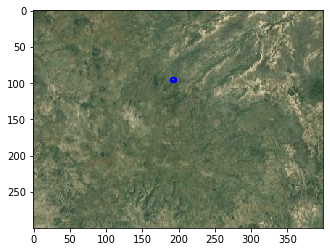

In [111]:
img = cv2.imread(os.path.join(satellites_folder, train_filenames[0] + '.png'))

img_copy = img.copy()
x1, y1, x2, y2 = bbox
cv2.rectangle(img_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))

In [128]:
class_idxs = {
    'wood':0,
    'water':1,
    'valley':2,
    'peak':3,
    'ridge':4
}

def calculate_all_bboxes(objects, tags, corners):
    assert(len(objects) == len(tags))
    
    bboxes = []
    
    for i in range(len(objects)):
        object_ = objects[i]
        tag = class_idxs[tags[i]]
        
        bbox = calculate_bbox_for_object(object_, corners)
        if bbox is not None:
            bboxes.append(','.join(map(str, list(bbox) + [tag])))
            
    return bboxes

In [130]:
def create_annotation_for_img_id(img_id):
    image_filename = img_id + '.png'
    data_filename = img_id + '.pickle'
    
    with open(os.path.join(objects_folder, data_filename), 'rb') as f:
        objects = pickle.load(f)
    with open(os.path.join(corners_folder, data_filename), 'rb') as f:
        corners = pickle.load(f)
    with open(os.path.join(tags_folder, data_filename), 'rb') as f:
        tags = pickle.load(f)
        
    bboxes = calculate_all_bboxes(objects, tags, corners)
    
    annotation = ' '.join([image_filename] + bboxes)
    return annotation

In [131]:
create_annotation_for_img_id(train_filenames[0])

'6646.png 190,93,196,98,1 109,155,115,163,0 278,156,284,164,0 278,249,284,257,3 9,17,15,25,3 156,315,162,323,3 287,214,293,222,3 293,202,299,210,3 215,100,221,108,3 48,51,54,59,3 77,112,83,120,3 103,92,109,100,3 279,178,285,186,3 262,255,268,263,3 207,182,213,190,3 7,93,13,101,3 60,89,66,97,3 207,219,213,227,3 235,93,241,101,3 86,88,92,96,3 266,279,272,287,3 71,86,77,94,3 162,23,168,31,3 242,133,248,141,3 12,57,18,65,3 65,69,71,77,3 286,65,292,73,3 22,38,28,46,3 180,72,186,80,3 284,32,290,40,3 275,201,281,209,3 235,295,241,303,3 292,284,298,292,3 192,100,198,108,3 95,166,101,174,3 273,53,279,61,3 113,77,119,85,3 116,92,122,100,3 90,0,96,8,3 252,159,258,167,3 53,80,59,88,3 276,157,282,165,3 236,357,242,365,3 92,392,98,399,3'

In [132]:
def create_annotations_for_list(image_ids):
    annotations = []
    for img_id in image_ids:
        annotations.append(create_annotation_for_img_id(img_id))
        
    return annotations

In [133]:
%%time
train_annotations = create_annotations_for_list(train_filenames)

CPU times: user 23.9 s, sys: 607 ms, total: 24.5 s
Wall time: 31 s


In [134]:
print(len(train_filenames))
print(len(train_annotations))

13109
13109


In [136]:
with open(os.path.join(yolo_dataset_path, '_train_annotations.txt'), 'w') as f:
    f.write('\n'.join(train_annotations))

In [137]:
validate_annotations = create_annotations_for_list(validate_filenames)
test_annotations = create_annotations_for_list(test_filenames)

In [138]:
print(len(validate_annotations), len(validate_filenames))
print(len(test_annotations), len(test_filenames))

4370 4370
4370 4370


In [139]:
with open(os.path.join(yolo_dataset_path, '_validate_annotations.txt'), 'w') as f:
    f.write('\n'.join(validate_annotations))
    
with open(os.path.join(yolo_dataset_path, '_test_annotations.txt'), 'w') as f:
    f.write('\n'.join(test_annotations))

### 2. Теперь нужно понять, как устроена сетка, и что в неё можно запихать

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import tensorflow as tf
gpu_options = tf.GPUOptions(allow_growth=True)

In [7]:
sys.path.append('keras-yolo3/')

In [8]:
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [9]:
BATCH_SIZE = 1

In [10]:
from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data

In [11]:
yolo_dataset_path = 'YOLO_DATASET_ANNOTATIONS/'

train_annotation_path = os.path.join(yolo_dataset_path, '_train_annotations.txt')
validate_annotation_path = os.path.join(yolo_dataset_path, '_validate_annotations.txt')
test_annotation_path = os.path.join(yolo_dataset_path, '_test_annotations.txt')

In [12]:
log_dir = 'yolo_logs/000/'

In [15]:
classes_path = os.path.join(yolo_dataset_path, '_classes.txt')
anchors_path = 'keras-yolo3/model_data/tiny_yolo_anchors.txt'
# anchors_path = 'keras-yolo3/model_data/yolo_anchors.txt'
class_names = get_classes(classes_path)

In [16]:
print("-------------------CLASS NAMES-------------------")
print(class_names)
print("-------------------CLASS NAMES-------------------")

-------------------CLASS NAMES-------------------
['wood', 'water', 'valley', 'peak', 'ridge']
-------------------CLASS NAMES-------------------


In [17]:
def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)

In [18]:
num_classes = len(class_names)
anchors = get_anchors(anchors_path)

In [19]:
anchors

array([[ 10.,  14.],
       [ 23.,  27.],
       [ 37.,  58.],
       [ 81.,  82.],
       [135., 169.],
       [344., 319.]])

In [20]:
input_shape = (416, 416) # multiple of 32, hw
print(input_shape) ### должно быть (416, 416)

(416, 416)


In [21]:
is_tiny_version = len(anchors)==6 # default setting
print(is_tiny_version)

True


In [22]:
def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    ###
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
    keras.backend.tensorflow_backend.set_session(sess)
    ###
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]
#     y_true = [Input(shape=(h//{0:BATCH_SIZE, 1:16, 2:8}[l], w//{0:BATCH_SIZE, 1:16, 2:8}[l], \
#         num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    ###
    sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
    keras.backend.tensorflow_backend.set_session(sess)
    ###
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]
#     y_true = [Input(shape=(h//{0:BATCH_SIZE, 1:16}[l], w//{0:BATCH_SIZE, 1:16}[l], \
#         num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

In [23]:
if is_tiny_version:
    print("________________________IS TINY VERSION_________________________")
    model = create_tiny_model(input_shape, anchors, num_classes,
        freeze_body=2, weights_path='keras-yolo3/model_data/yolo.h5')
else:
    model = create_model(input_shape, anchors, num_classes,
        freeze_body=2, weights_path='keras-yolo3/model_data/yolo.h5') # make sure you know what you freeze

________________________IS TINY VERSION_________________________












Create Tiny YOLOv3 model with 6 anchors and 5 classes.
Load weights keras-yolo3/model_data/yolo.h5.
Freeze the first 42 layers of total 44 layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
logging = TensorBoard(log_dir=log_dir)
checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
    monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1)


In [13]:
with open(train_annotation_path, 'r') as f:
    train_lines = list(map(lambda x: '../dataset/map/' + x.strip() , f.readlines()))

with open(validate_annotation_path, 'r') as f:
    validate_lines = list(map(lambda x: '../dataset/map/' + x.strip() , f.readlines()))
    
with open(test_annotation_path, 'r') as f:
    test_lines = list(map(lambda x: '../dataset/map/' + x.strip() , f.readlines()))

In [26]:
num_train = len(train_lines)
num_val = len(validate_lines)

In [27]:
def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

In [28]:
# Train with frozen layers first, to get a stable loss.
# Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
if True:
    model.compile(optimizer=Adam(lr=1e-3), loss={
        # use custom yolo_loss Lambda layer.
        'yolo_loss': lambda y_true, y_pred: y_pred})

    batch_size = BATCH_SIZE
    print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
    model.fit_generator(data_generator_wrapper(train_lines, batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(validate_lines, batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=15,
            initial_epoch=0,
            callbacks=[logging, checkpoint])
    model.save_weights(log_dir + 'trained_weights_stage_1.h5')


Train on 13109 samples, val on 4370 samples, with batch size 1.




Epoch 1/15
13109/13109 [==============================] - 1655s 126ms/step - loss: 35.1478 - val_loss: 32.2185

Epoch 2/15
13109/13109 [==============================] - 1655s 126ms/step - loss: 32.0862 - val_loss: 32.1517
Epoch 3/15
 5087/13109 [==========>...................] - ETA: 12:28 - loss: 33.1501

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 3819/13109 [=======>......................] - ETA: 14:42 - loss: 33.9057

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13109/13109 [==============================] - 1641s 125ms/step - loss: 32.8729 - val_loss: 33.1651
Epoch 5/15
 2170/13109 [===>..........................] - ETA: 16:52 - loss: 33.6943

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13109/13109 [==============================] - 1629s 124ms/step - loss: 32.9062 - val_loss: 33.4651
Epoch 6/15
  423/13109 [..............................] - ETA: 19:48 - loss: 34.0752

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11823/13109 [==========================>...] - ETA: 2:02 - loss: 33.1921

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 9353/13109 [====================>.........] - ETA: 6:01 - loss: 32.7528

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 7183/13109 [===============>..............] - ETA: 9:28 - loss: 33.0457

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 3579/13109 [=======>......................] - ETA: 14:54 - loss: 32.4752

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



12913/13109 [============================>.] - ETA: 18s - loss: 32.5118

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 9154/13109 [===================>..........] - ETA: 6:20 - loss: 33.1038

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 4466/13109 [=========>....................] - ETA: 13:46 - loss: 32.9552

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 6818/13109 [==============>...............] - ETA: 10:02 - loss: 32.9850

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13109/13109 [==============================] - 1651s 126ms/step - loss: 32.1808 - val_loss: 33.3742
Epoch 12/15
  885/13109 [=>............................] - ETA: 19:04 - loss: 33.3070

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 3210/13109 [======>.......................] - ETA: 15:40 - loss: 34.4367

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



11593/13109 [=========================>....] - ETA: 2:23 - loss: 33.0706

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13109/13109 [==============================] - 1638s 125ms/step - loss: 32.8282 - val_loss: 33.1172
Epoch 13/15
  850/13109 [>.............................] - ETA: 19:30 - loss: 34.0835

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 8042/13109 [=================>............] - ETA: 8:02 - loss: 33.1624

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



10352/13109 [======================>.......] - ETA: 4:22 - loss: 32.9274

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 4283/13109 [========>.....................] - ETA: 13:56 - loss: 31.7155

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 6622/13109 [==============>...............] - ETA: 10:17 - loss: 31.9504

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 1920/13109 [===>..........................] - ETA: 17:16 - loss: 31.4723

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 4209/13109 [========>.....................] - ETA: 14:02 - loss: 32.3824

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



12776/13109 [============================>.] - ETA: 31s - loss: 32.7015

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
if True:
    for i in range(len(model.layers)):
        model.layers[i].trainable = True
    model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
    print('Unfreeze all of the layers.')

    batch_size = BATCH_SIZE # note that more GPU memory is required after unfreezing the body
    print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
    model.fit_generator(data_generator_wrapper(train_lines, batch_size, input_shape, anchors, num_classes),
        steps_per_epoch=max(1, num_train//batch_size),
        validation_data=data_generator_wrapper(validate_lines, batch_size, input_shape, anchors, num_classes),
        validation_steps=max(1, num_val//batch_size),
        epochs=20,
        initial_epoch=10,
        callbacks=[logging, checkpoint, reduce_lr, early_stopping])
    model.save_weights(log_dir + 'trained_weights_final.h5')


Unfreeze all of the layers.
Train on 13109 samples, val on 4370 samples, with batch size 1.
Epoch 11/20
 2998/13109 [=====>........................] - ETA: 1:00:25 - loss: 30.5627

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13109/13109 [==============================] - 5088s 388ms/step - loss: 30.6238 - val_loss: 30.3597
Epoch 12/20
  692/13109 [>.............................] - ETA: 1:13:54 - loss: 29.7175

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



10077/13109 [======================>.......] - ETA: 18:02 - loss: 28.6055

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 6319/13109 [=============>................] - ETA: 40:25 - loss: 27.3174

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 3779/13109 [=======>......................] - ETA: 55:32 - loss: 27.9703

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13109/13109 [==============================] - 5082s 388ms/step - loss: 27.0852 - val_loss: 28.4400
Epoch 15/20
  104/13109 [..............................] - ETA: 1:17:26 - loss: 21.2483

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 9533/13109 [====================>.........] - ETA: 21:16 - loss: 26.3557

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 6120/13109 [=============>................] - ETA: 41:38 - loss: 27.0553

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 3224/13109 [======>.......................] - ETA: 58:51 - loss: 25.9506

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



12504/13109 [===========================>..] - ETA: 3:36 - loss: 26.5073

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 8867/13109 [===================>..........] - ETA: 25:15 - loss: 25.5656

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 6474/13109 [=============>................] - ETA: 39:30 - loss: 25.6414

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



13109/13109 [==============================] - 5090s 388ms/step - loss: 26.3231 - val_loss: 28.2937

Epoch 00019: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
Epoch 00019: early stopping


### Теперь можно прогонять inference

In [14]:
from keras.models import load_model

In [39]:
# model_path = log_dir + 'trained_weights_final.h5'
# print("Model path:", model_path)

# classes_path = os.path.join(yolo_dataset_path, '_classes.txt')
# print("Classes path:", classes_path)

# print("Anchors path:", anchors_path)

Model path: yolo_logs/000/trained_weights_final.h5
Classes path: YOLO_DATASET_ANNOTATIONS/_classes.txt
Anchors path: keras-yolo3/model_data/tiny_yolo_anchors.txt


In [15]:
model_path = 'yolo_logs/000/trained_weights_final.h5'
classes_path = 'YOLO_DATASET_ANNOTATIONS/_classes.txt'
anchors_path = 'keras-yolo3/model_data/tiny_yolo_anchors.txt'

In [16]:
from yolo import YOLO, detect_video
from PIL import Image

In [17]:
def detect_img(yolo, image_filename):
    image = Image.open(image_filename)
    r_image = yolo.detect_image(image)
    plt.imshow(r_image)
    plt.show()
#     yolo.close_session()


In [18]:
FLAGS = {
    "model_path": model_path,
    "anchors_path": anchors_path,
    "classes_path": classes_path,
    "store_true": True
}

In [19]:
K.clear_session() # get a new session
###
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
keras.backend.tensorflow_backend.set_session(sess)

In [20]:
yolo = YOLO(**FLAGS)










yolo_logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


(416, 416, 3)
Found 0 boxes for img
0.36897749500349164


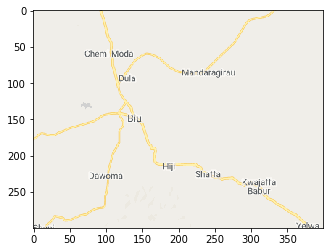

In [30]:
detect_img(yolo, train_lines[0].split(' ')[0])

(416, 416, 3)
Found 0 boxes for img
0.07317072991281748


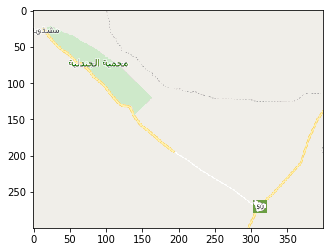

In [31]:
detect_img(yolo, train_lines[1].split(' ')[0])

(416, 416, 3)
Found 0 boxes for img
0.07719259103760123


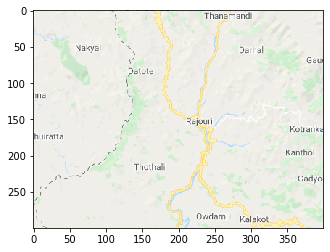

In [32]:
detect_img(yolo, train_lines[2].split(' ')[0])

(416, 416, 3)
Found 0 boxes for img
0.07248688908293843


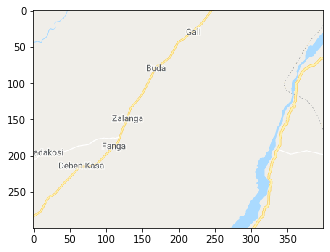

In [33]:
detect_img(yolo, train_lines[3].split(' ')[0])

### Теперь интересно узнать, найдётся ли хоть где-нибудь хоть что-нибудь

In [21]:
def detect_img(yolo, image_filename):
    image = Image.open(image_filename)
    r_image, boxes_out_len = yolo.detect_image(image)
    if boxes_out_len != 0:
        plt.imshow(r_image)
        plt.show()


In [22]:
for train_line in train_lines:
    detect_img(yolo, train_line.split(' ')[0])